# MMM Analysis

In [36]:
# Import required packages
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from saturation import ExponentialSaturation
from carryover import ExponentialCarryover
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:.2f}'.format

In [37]:
# Note - data has been preprocessed 
df = pd.read_csv('MMM_Data3.csv', skiprows=1, index_col='Date')

<AxesSubplot: >

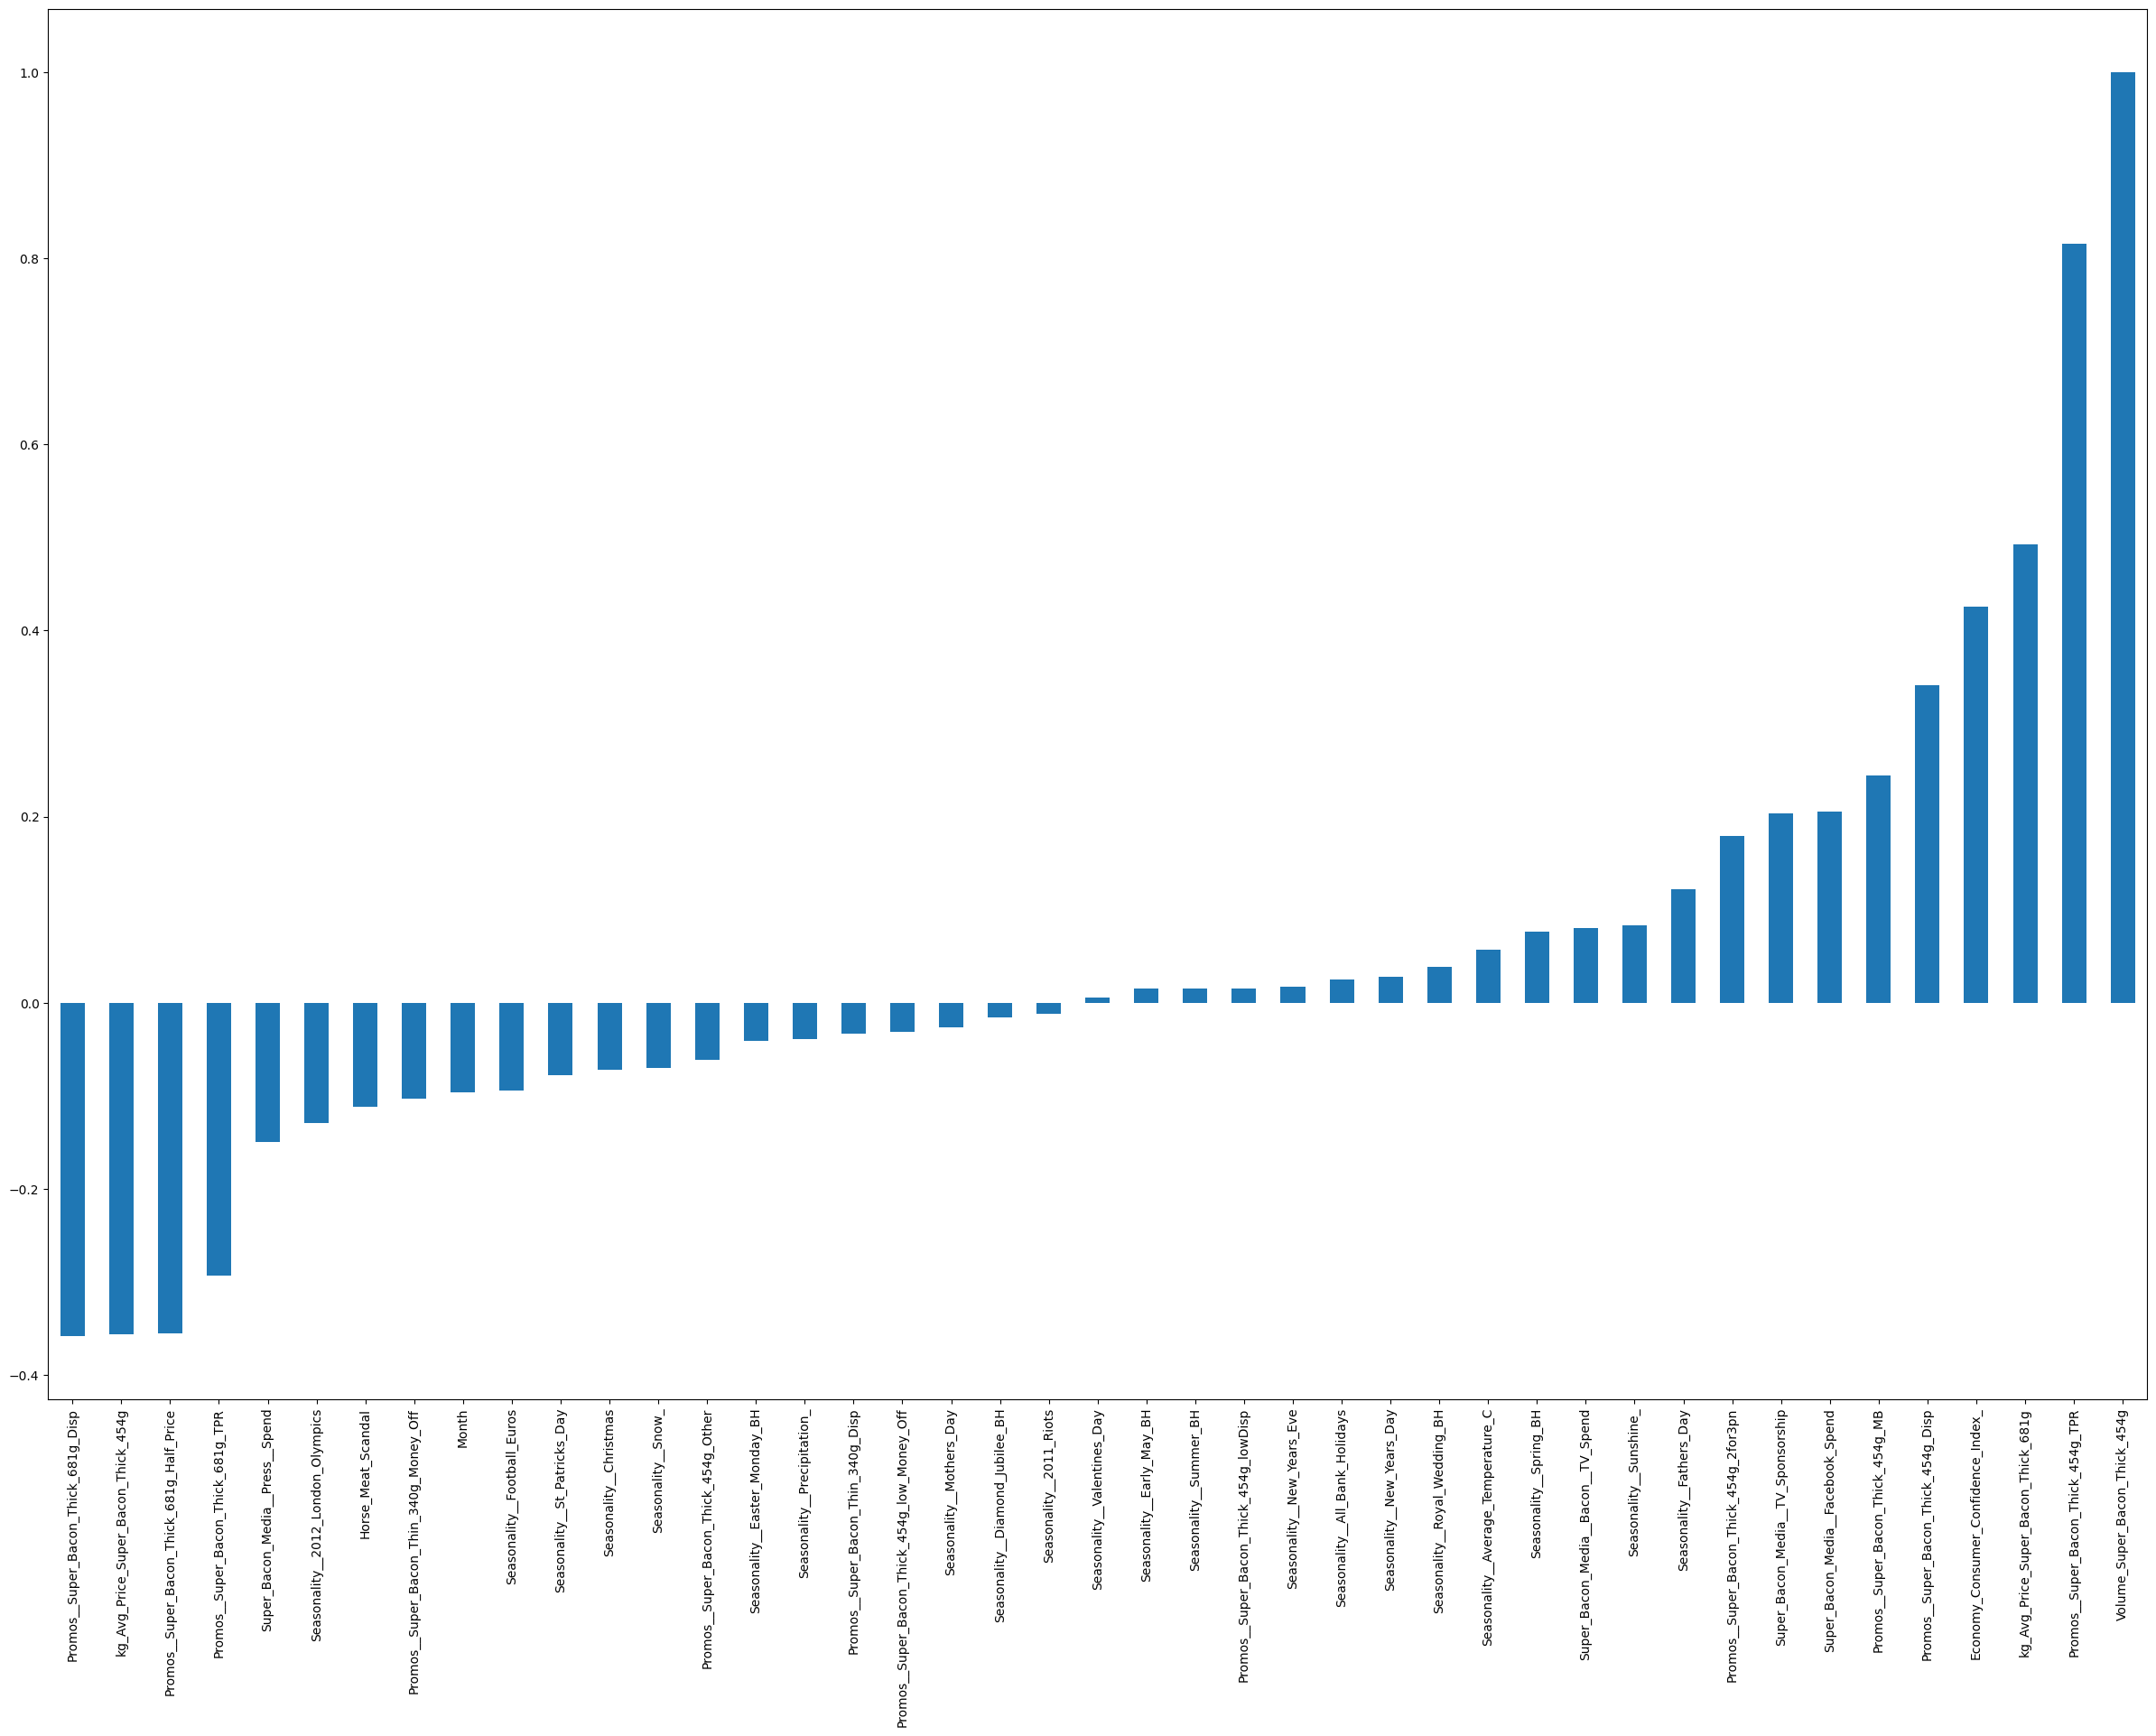

In [38]:
df.corr()['Volume_Super_Bacon_Thick_454g'].sort_values().plot.bar(figsize=(30,20))

# In general subsitute product advertisement leads to lower returns for the 454g super bacon product, there are several factors which will need to be considered in our analysis

In [39]:
# Identify our X and y
y = df['Volume_Super_Bacon_Thick_454g']

<AxesSubplot: xlabel='Date'>

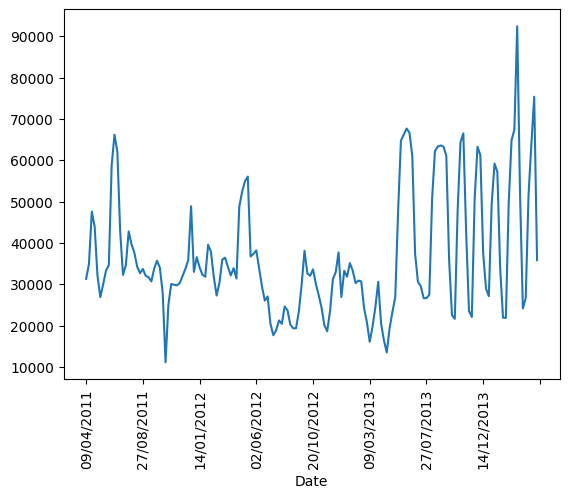

In [40]:
# Plot our dependent variable, there is a lot of volatility toward the end of the year
y.plot(rot=90)

In [41]:
# Create month dummies and concat them to dataframe
dummies = pd.get_dummies(df['Month']).rename(columns=lambda x: 'Month_' + str(x))
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Month'], inplace=True)

In [42]:
X = df.drop(columns=['Volume_Super_Bacon_Thick_454g'])

In [43]:
# Define all columns to add to OLS model, and create formula input
all_columns = "+".join(df.drop(columns=['Volume_Super_Bacon_Thick_454g']).columns)
my_formula = "Volume_Super_Bacon_Thick_454g~" + all_columns

In [44]:
# Use exponential carryover effects for media spend

df['Super_Bacon_Media__Bacon__TV_Spend'] = ExponentialCarryover().fit_transform(np.array(df['Super_Bacon_Media__Bacon__TV_Spend']).reshape(-1,1))
#df['Super_Bacon_Media__Bacon__TV_Spend'] = ExponentialSaturation().fit_transform(np.array(df['Super_Bacon_Media__Bacon__TV_Spend']).reshape(-1,1))

df['Super_Bacon_Media__Press__Spend'] = ExponentialCarryover().fit_transform(np.array(df['Super_Bacon_Media__Press__Spend']).reshape(-1,1))
#df['Super_Bacon_Media__Press__Spend'] = ExponentialSaturation().fit_transform(np.array(df['Super_Bacon_Media__Press__Spend']).reshape(-1,1))

df['Super_Bacon_Media__Facebook_Spend'] = ExponentialCarryover().fit_transform(np.array(df['Super_Bacon_Media__Facebook_Spend']).reshape(-1,1))
#df['Super_Bacon_Media__Facebook_Spend'] = ExponentialSaturation().fit_transform(np.array(df['Super_Bacon_Media__Facebook_Spend']).reshape(-1,1))

df['Super_Bacon_Media__TV_Sponsorship'] = ExponentialCarryover().fit_transform(np.array(df['Super_Bacon_Media__TV_Sponsorship']).reshape(-1,1))
#df['Super_Bacon_Media__TV_Sponsorship'] = ExponentialSaturation().fit_transform(np.array(df['Super_Bacon_Media__TV_Sponsorship']).reshape(-1,1))

In [45]:
# run OLS model
model = sm.OLS.from_formula(formula=my_formula, data = df).fit()

In [46]:
# Get model coefficients and summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Volume_Super_Bacon_Thick_454g   R-squared:                       0.938
Model:                                       OLS   Adj. R-squared:                  0.908
Method:                            Least Squares   F-statistic:                     31.19
Date:                           Tue, 21 Feb 2023   Prob (F-statistic):           9.70e-46
Time:                                   00:14:31   Log-Likelihood:                -1540.5
No. Observations:                            160   AIC:                             3187.
Df Residuals:                                107   BIC:                             3350.
Df Model:                                     52                                         
Covariance Type:                       nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     3.198e+04   9888.921      3.234      0.002    1.24e+04    5.16e+04
kg_Avg_Price_Super_Bacon_Thick_454g          -3562.5676   2016.057     -1.767      0.080   -7559.165     434.030
kg_Avg_Price_Super_Bacon_Thick_681g           1413.4738   1620.642      0.872      0.385   -1799.260    4626.207
Promos__Super_Bacon_Thick_454g_lowDisp        1.286e+04   2.81e+04      0.457      0.648   -4.29e+04    6.86e+04
Promos__Super_Bacon_Thick_454g_Disp          -2441.3343   1.08e+04     -0.226      0.821   -2.38e+04    1.89e+04
Promos__Super_Bacon_Thick_454g_Other          1.497e+04   1.11e+04      1.349      0.180   -7028.221     3.7e+04
Promos__Super_Bacon_Thick_454g_low_Money_Off  3.167e+04   1.45e+04      2.192      0.031    3026.084    6.03e+04
Promos__Super_Bacon_Thick_454g_MB             2.803e+05    3.3e+04      8.482      0.000    2.15e+05    3.46e+05
Promos__Super_Bacon_Thick_454g_2for3pn         9.65e+04   1.63e+04      5.933      0.000    6.43e+04    1.29e+05
Promos__Super_Bacon_Thick_454g_TPR            1.856e+05   1.37e+04     13.587      0.000    1.59e+05    2.13e+05
Promos__Super_Bacon_Thick_681g_Disp          -1502.8756   4991.456     -0.301      0.764   -1.14e+04    8392.103
Promos__Super_Bacon_Thick_681g_TPR           -1.362e+04   8687.125     -1.568      0.120   -3.08e+04    3600.273
Promos__Super_Bacon_Thick_681g_Half_Price    -1.397e+04   8591.933     -1.626      0.107    -3.1e+04    3063.019
Promos__Super_Bacon_Thin_340g_Disp            1.452e+04   1.68e+04      0.866      0.389   -1.87e+04    4.78e+04
Promos__Super_Bacon_Thin_340g_Money_Off       1450.1797   6400.387      0.227      0.821   -1.12e+04    1.41e+04
Economy_Consumer_Confidence_Index_            -109.9038     79.189     -1.388      0.168    -266.886      47.079
Horse_Meat_Scandal                              32.3674     42.507      0.761      0.448     -51.897     116.632
Super_Bacon_Media__Bacon__TV_Spend               0.0267      0.021      1.285      0.202      -0.014       0.068
Super_Bacon_Media__Press__Spend                 -0.2931      0.231     -1.270      0.207      -0.751       0.164
Super_Bacon_Media__Facebook_Spend               -0.5635      0.667     -0.845      0.400      -1.886       0.759
Super_Bacon_Media__TV_Sponsorship                0.1121      0.115      0.978      0.330      -0.115       0.339
Seasonality__Average_Temperature_C             442.6145    267.675      1.654      0.101     -88.019     973.248
Seasonality__Snow_                             104.3958     94.221      1.108      0.270     -82.386     291.178
Seasonality__Precipitati

In [47]:
predictions = pd.DataFrame(model.predict(X))
predictions

,0
Date,
09/04/2011,29425.80
16/04/2011,30209.75
23/04/2011,41812.92
30/04/2011,43975.30
07/05/2011,26403.08
...,...
29/03/2014,22470.29
05/04/2014,49744.93
12/04/2014,65928.69


<AxesSubplot: xlabel='Date'>

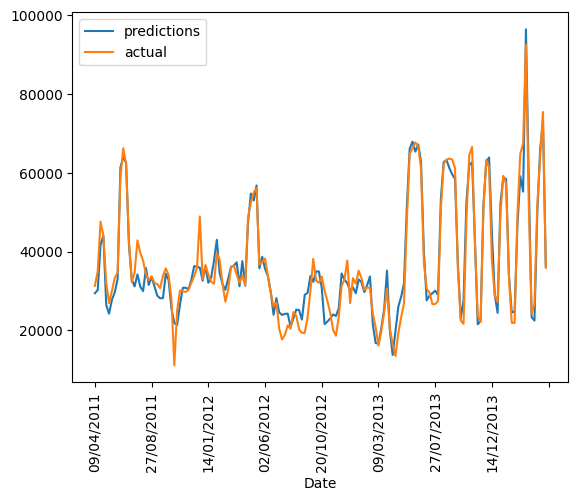

In [48]:
# Create graph

graph = pd.concat([predictions, pd.DataFrame(y)], axis=1)
graph.rename(columns={0:'predictions', 'Volume_Super_Bacon_Thick_454g':'actual'}, inplace=True)
graph[['predictions', 'actual']].plot(rot = 90)

In [49]:
# Rsquared value
model.rsquared

0.9381102846808976

In [50]:
# Results summary and export to csv

results_summary = model.summary()
#results_as_html = results_summary.tables[1]
#pd.DataFrame(results_as_html).to_csv('final_results_unadjusted.csv')

In [51]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Volume_Super_Bacon_Thick_454g   R-squared:                       0.938
Model:                                       OLS   Adj. R-squared:                  0.908
Method:                            Least Squares   F-statistic:                     31.19
Date:                           Tue, 21 Feb 2023   Prob (F-statistic):           9.70e-46
Time:                                   00:14:34   Log-Likelihood:                -1540.5
No. Observations:                            160   AIC:                             3187.
Df Residuals:                                107   BIC:                             3350.
Df Model:                                     52                                         
Covariance Type:                       nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     3.198e+04   9888.921      3.234      0.002    1.24e+04    5.16e+04
kg_Avg_Price_Super_Bacon_Thick_454g          -3562.5676   2016.057     -1.767      0.080   -7559.165     434.030
kg_Avg_Price_Super_Bacon_Thick_681g           1413.4738   1620.642      0.872      0.385   -1799.260    4626.207
Promos__Super_Bacon_Thick_454g_lowDisp        1.286e+04   2.81e+04      0.457      0.648   -4.29e+04    6.86e+04
Promos__Super_Bacon_Thick_454g_Disp          -2441.3343   1.08e+04     -0.226      0.821   -2.38e+04    1.89e+04
Promos__Super_Bacon_Thick_454g_Other          1.497e+04   1.11e+04      1.349      0.180   -7028.221     3.7e+04
Promos__Super_Bacon_Thick_454g_low_Money_Off  3.167e+04   1.45e+04      2.192      0.031    3026.084    6.03e+04
Promos__Super_Bacon_Thick_454g_MB             2.803e+05    3.3e+04      8.482      0.000    2.15e+05    3.46e+05
Promos__Super_Bacon_Thick_454g_2for3pn         9.65e+04   1.63e+04      5.933      0.000    6.43e+04    1.29e+05
Promos__Super_Bacon_Thick_454g_TPR            1.856e+05   1.37e+04     13.587      0.000    1.59e+05    2.13e+05
Promos__Super_Bacon_Thick_681g_Disp          -1502.8756   4991.456     -0.301      0.764   -1.14e+04    8392.103
Promos__Super_Bacon_Thick_681g_TPR           -1.362e+04   8687.125     -1.568      0.120   -3.08e+04    3600.273
Promos__Super_Bacon_Thick_681g_Half_Price    -1.397e+04   8591.933     -1.626      0.107    -3.1e+04    3063.019
Promos__Super_Bacon_Thin_340g_Disp            1.452e+04   1.68e+04      0.866      0.389   -1.87e+04    4.78e+04
Promos__Super_Bacon_Thin_340g_Money_Off       1450.1797   6400.387      0.227      0.821   -1.12e+04    1.41e+04
Economy_Consumer_Confidence_Index_            -109.9038     79.189     -1.388      0.168    -266.886      47.079
Horse_Meat_Scandal                              32.3674     42.507      0.761      0.448     -51.897     116.632
Super_Bacon_Media__Bacon__TV_Spend               0.0267      0.021      1.285      0.202      -0.014       0.068
Super_Bacon_Media__Press__Spend                 -0.2931      0.231     -1.270      0.207      -0.751       0.164
Super_Bacon_Media__Facebook_Spend               -0.5635      0.667     -0.845      0.400      -1.886       0.759
Super_Bacon_Media__TV_Sponsorship                0.1121      0.115      0.978      0.330      -0.115       0.339
Seasonality__Average_Temperature_C             442.6145    267.675      1.654      0.101     -88.019     973.248
Seasonality__Snow_                             104.3958     94.221      1.108      0.270     -82.386     291.178
Seasonality__Precipitati

In [52]:
influence = model.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

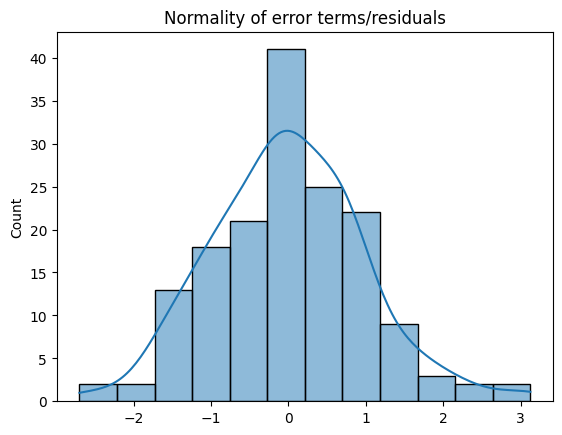

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.histplot(standardized_residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

[Text(0, 0.5, 'Standardised Residuals'), Text(0.5, 0, 'Fitted')]

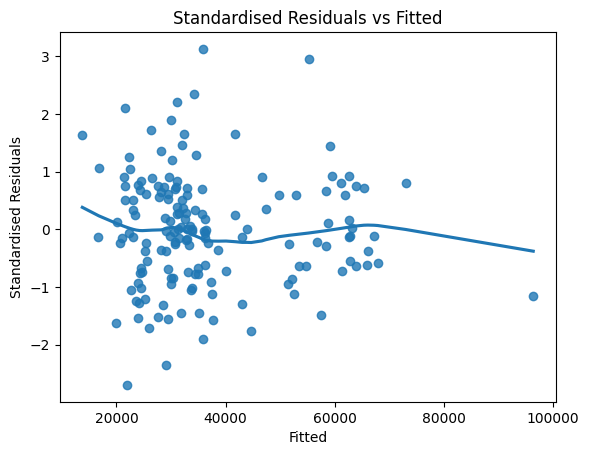

In [54]:
fig, ax = plt.subplots(1, 1)
sns.regplot(y=standardized_residuals,x=np.array(model.predict(X)), lowess=True)
ax.title.set_text('Standardised Residuals vs Fitted')
ax.set(ylabel='Standardised Residuals', xlabel='Fitted')

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted')]

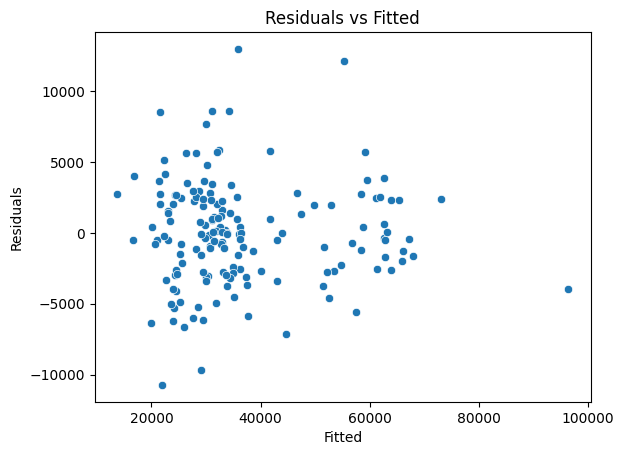

In [55]:
fig, ax = plt.subplots(1, 1)
sns.scatterplot(y=model.resid,x=np.array(model.predict(X)))
ax.title.set_text('Residuals vs Fitted')
ax.set(ylabel='Residuals', xlabel='Fitted')

In [56]:
# VIF Analysis
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.to_csv('vif_factors.csv')

c:\Users\jai_9\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


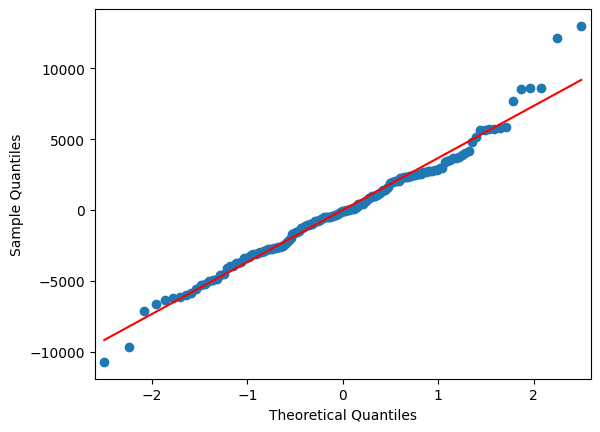

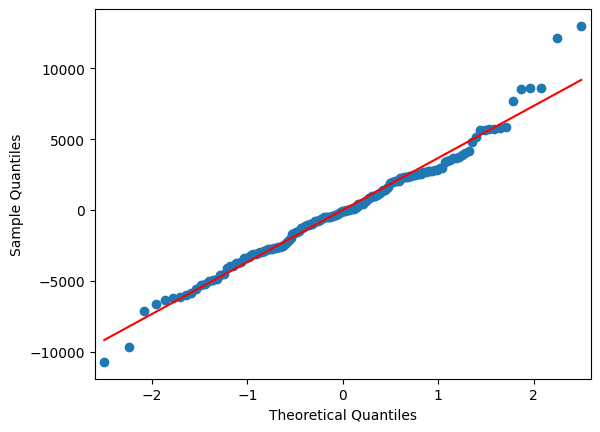

In [57]:
# QQ Plot
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(model.resid).qqplot(line='s', color='#1f77b4', ax=ax)

In [58]:
# Standardise data and run model to estimate real impact of coefficients
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
  
# transform data
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns = df.columns )

In [59]:
# run standardised model
model = sm.OLS.from_formula(formula=my_formula, data = df_scaled).fit()

In [60]:
# Export standardised results to csv
results_summary = model.summary()
results_as_html = results_summary.tables[1]
pd.DataFrame(results_as_html).to_csv('standardised_full_results.csv')

In [61]:
# parameter values for standardised model
model.params.sort_values(ascending=False)

Promos__Super_Bacon_Thick_454g_TPR              0.84
Promos__Super_Bacon_Thick_454g_MB               0.31
Seasonality__All_Bank_Holidays                  0.22
Promos__Super_Bacon_Thick_454g_2for3pn          0.21
Seasonality__Average_Temperature_C              0.14
Month_12                                        0.10
kg_Avg_Price_Super_Bacon_Thick_681g             0.09
Promos__Super_Bacon_Thick_454g_low_Money_Off    0.09
Month_11                                        0.07
Promos__Super_Bacon_Thick_454g_Other            0.06
Super_Bacon_Media__Bacon__TV_Spend              0.04
Month_2                                         0.04
Seasonality__2011_Riots                         0.04
Seasonality__Snow_                              0.04
Month_4                                         0.04
Seasonality__Royal_Wedding_BH                   0.03
Month_1                                         0.03
Super_Bacon_Media__TV_Sponsorship               0.03
Horse_Meat_Scandal                            

<AxesSubplot: title={'center': 'Standardised Impact Effects On Volume On Bacon 454g'}>

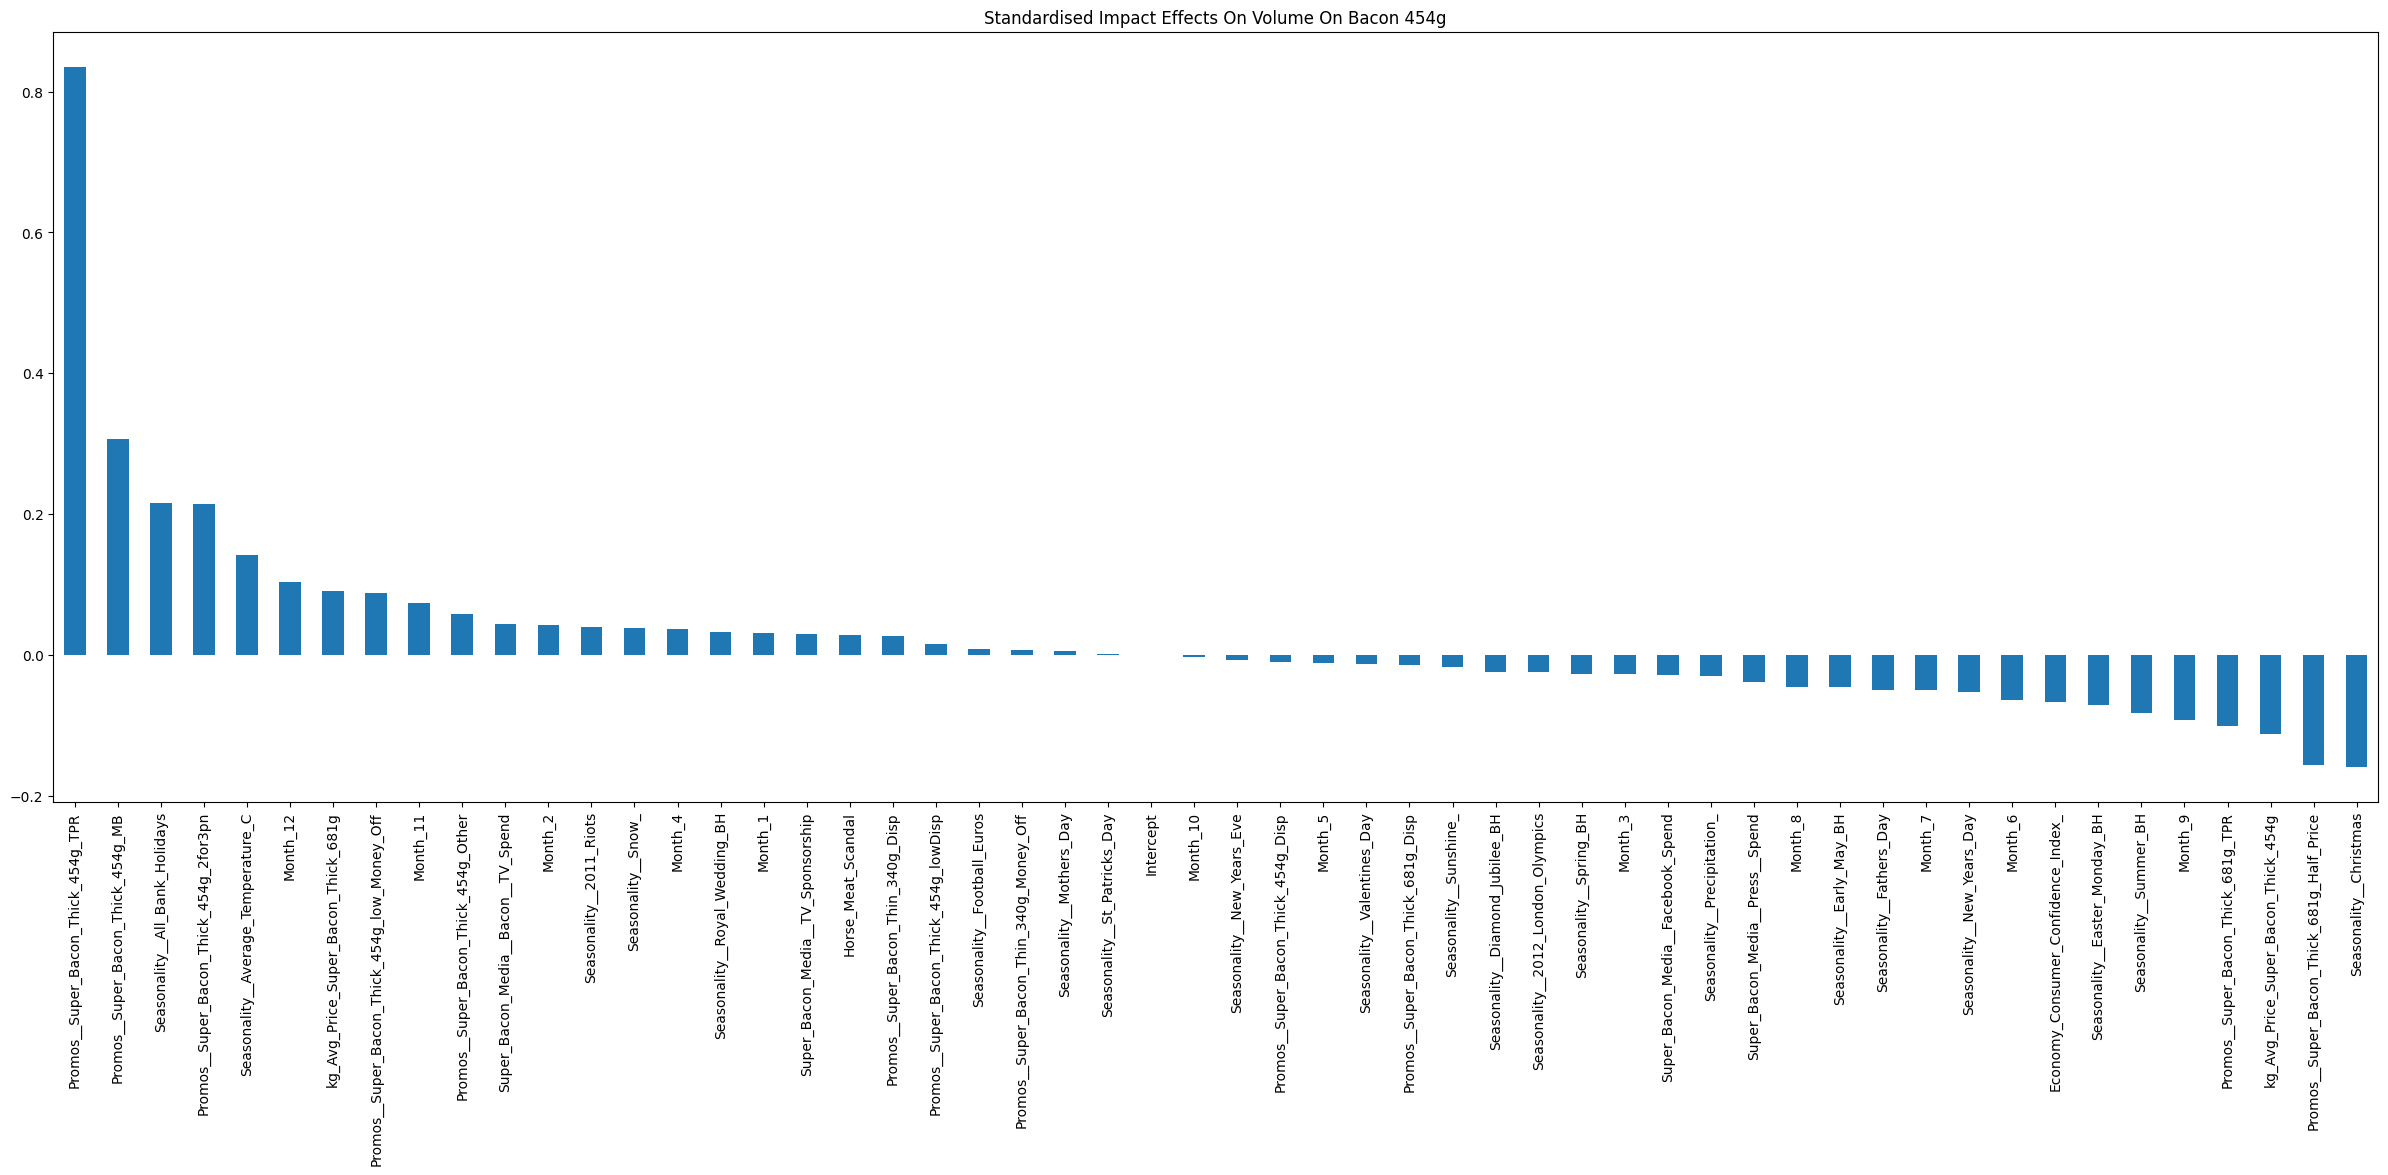

In [62]:
# Standardised impacts chart
model.params.sort_values(ascending=False).plot.bar(figsize = (30,10), title = 'Standardised Impact Effects On Volume On Bacon 454g')